In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import gzip
import matplotlib.pyplot as plt

In [2]:
books_path = 'data/goodreads_books.json.gz'
authors_path = 'data/goodreads_book_authors.json.gz'
genres_path = 'data/goodreads_book_genres_initial.json.gz'
interactions_path = 'data/goodreads_interactions.csv'
reviews_path = 'data/goodreads_reviews_spoiler_raw.json.gz'
chunksize = 1000

In [3]:
books_df = pd.read_json(gzip.open(books_path), lines=True, chunksize=chunksize)
authors_df = pd.read_json(gzip.open(authors_path), lines=True, chunksize=chunksize)
genres_df = pd.read_json(gzip.open(genres_path), lines=True, chunksize=chunksize)
reviews_df = pd.read_json(gzip.open(reviews_path), lines=True, chunksize=chunksize)
int_df = pd.read_csv(interactions_path, chunksize=chunksize)

## Books

In [4]:
books_counts = pd.DataFrame(columns=['text_reviews_count', 'ratings_count'])
for chunk in books_df:
    counts = chunk[['text_reviews_count', 'ratings_count']]
    books_counts = pd.concat([books_counts, counts])

In [5]:
books_counts.describe()

,text_reviews_count,ratings_count
count,2360655,2360655
unique,6071,24835
top,1,1
freq,469194,130819


In [92]:
n_bins = 10000
start_p = 0.001
bins = [x/p_bins for x in range(int(start_p*n_bins), n_bins+1)]
review_percentiles = books_counts['text_reviews_count'].replace('', 0).astype(int).quantile(bins)
rating_percentiles = books_counts['ratings_count'].replace('', 0).astype(int).quantile(bins)
review_percentiles = pd.DataFrame(review_percentiles).reset_index().rename(columns={'index': 'percentile'})
rating_percentiles = pd.DataFrame(rating_percentiles).reset_index().rename(columns={'index': 'percentile'})
percentiles = review_percentiles.merge(rating_percentiles, on='percentile')
percentiles['n'] = (1 - percentiles['percentile']) * len(books_counts)
percentiles.head(3)

,percentile,text_reviews_count,ratings_count,n
0,0.0010,1.0,0.0,2.358294e+06
1,0.0011,1.0,0.0,2.358058e+06
2,0.0012,1.0,0.0,2.357822e+06


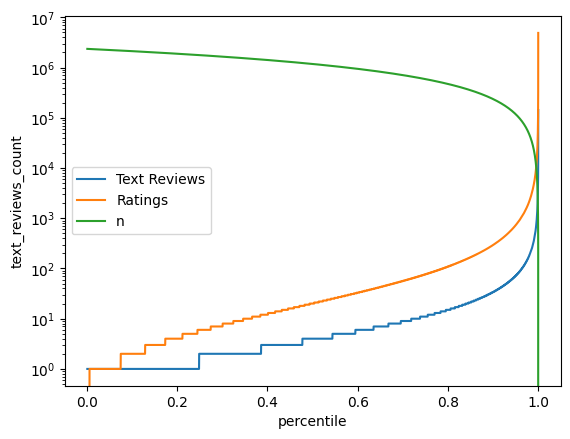

In [93]:
sns.lineplot(x=percentiles.percentile, y=percentiles.text_reviews_count, label='Text Reviews')
sns.lineplot(x=percentiles.percentile, y=percentiles.ratings_count, label='Ratings')
sns.lineplot(x=percentiles.percentile, y=percentiles.n, label='n')
plt.yscale('log')
plt.legend()
plt.show()

In [94]:
percentiles.sort_values('n').head(20)

,percentile,text_reviews_count,ratings_count,n
9990,1.0000,142645.0000,4.899965e+06,0.0000
9989,0.9999,13708.7954,3.313316e+05,236.0655
9988,0.9998,8982.6076,1.855977e+05,472.1310
9987,0.9997,6702.6266,1.323347e+05,708.1965
9986,0.9996,5343.7384,1.030745e+05,944.2620
9985,0.9995,4522.0760,8.456542e+04,1180.3275
9984,0.9994,3901.8228,7.119923e+04,1416.3930
9983,0.9993,3503.0000,6.261679e+04,1652.4585
9982,0.9992,3146.0000,5.540286e+04,1888.5240
9981,0.9991,2853.0000,4.954788e+04,2124.5895


In [100]:
books_df2 = pd.read_csv('data/supplementary/book1-100k.csv')
books_df2.head()

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,PublishYear,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3
0,1,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652,4:556485,total:2298124,16,9,Scholastic Inc.,28062,2006,eng,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960
1,2,Harry Potter and the Order of the Phoenix (Har...,1:12455,870,4:604283,total:2358637,1,9,Scholastic Inc.,29770,2004,eng,J.K. Rowling,4.50,2:37005,5:1493113,0439358078,3:211781
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309,4:1513191,total:6587388,1,11,Scholastic Inc,75911,2003,eng,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458
3,4,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352,4:706082,total:2560657,1,11,Scholastic,244,2003,eng,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435,4:630534,total:2610317,1,5,Scholastic Inc.,37093,2004,eng,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848


In [101]:
books_df2 = books_df2[['RatingDist1', 'RatingDist2', 'RatingDist3', 'RatingDist4', 'RatingDist5', 'RatingDistTotal', 'Rating',
                     'CountsOfReview', 'PublishYear', 'Language', 'Name', 'Authors', 'pagesNumber', 'ISBN', 'Id']]
books_df2.head()

,RatingDist1,RatingDist2,RatingDist3,RatingDist4,RatingDist5,RatingDistTotal,Rating,CountsOfReview,PublishYear,Language,Name,Authors,pagesNumber,ISBN,Id
0,1:9896,2:25317,3:159960,4:556485,5:1546466,total:2298124,4.57,28062,2006,eng,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,652,NaN,1
1,1:12455,2:37005,3:211781,4:604283,5:1493113,total:2358637,4.50,29770,2004,eng,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,870,0439358078,2
2,1:108202,2:130310,3:567458,4:1513191,5:4268227,total:6587388,4.47,75911,2003,eng,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,309,NaN,3
3,1:11896,2:49353,3:288821,4:706082,5:1504505,total:2560657,4.42,244,2003,eng,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,352,0439554896,4
4,1:10128,2:24849,3:194848,4:630534,5:1749958,total:2610317,4.57,37093,2004,eng,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,435,043965548X,5


In [104]:
for chunk in books_df:
    books_chunk = chunk
    break

In [106]:
books_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn                  1000 non-null   object 
 1   text_reviews_count    1000 non-null   int64  
 2   series                1000 non-null   object 
 3   country_code          1000 non-null   object 
 4   language_code         1000 non-null   object 
 5   popular_shelves       1000 non-null   object 
 6   asin                  1000 non-null   object 
 7   is_ebook              1000 non-null   object 
 8   average_rating        1000 non-null   float64
 9   kindle_asin           1000 non-null   object 
 10  similar_books         1000 non-null   object 
 11  description           1000 non-null   object 
 12  format                1000 non-null   object 
 13  link                  1000 non-null   object 
 14  authors               1000 non-null   object 
 15  publisher             

In [108]:
books_chunk = books_chunk[['isbn', 'text_reviews_count', 'country_code', 'language_code', 'average_rating', 'num_pages', 'isbn13',
                          'publication_year', 'book_id', 'ratings_count', 'title']]

In [109]:
books_chunk.head()

,isbn,text_reviews_count,country_code,language_code,average_rating,num_pages,isbn13,publication_year,book_id,ratings_count,title
0,0312853122,1,US,,4.00,256,9780312853129,1984,5333265,3,W.C. Fields: A Life on Film
1,0743509986,6,US,,3.23,,9780743509985,2001,1333909,10,Good Harbor
2,,7,US,eng,4.03,600,,1987,7327624,140,"The Unschooled Wizard (Sun Wolf and Starhawk, ..."
3,0743294297,3282,US,eng,3.49,368,9780743294294,2009,6066819,51184,Best Friends Forever
4,0850308712,5,US,,3.40,,9780850308716,,287140,15,Runic Astrology: Starcraft and Timekeeping in ...


## Genres

In [4]:
for chunk in genres_df:
    genres_chunk = chunk
    break
genres_chunk.head()

,book_id,genres
0,5333265,"{'history, historical fiction, biography': 1}"
1,1333909,"{'fiction': 219, 'history, historical fiction,..."
2,7327624,"{'fantasy, paranormal': 31, 'fiction': 8, 'mys..."
3,6066819,"{'fiction': 555, 'romance': 23, 'mystery, thri..."
4,287140,{'non-fiction': 3}


In [5]:
genres_chunk = genres_chunk['genres'].apply(pd.Series).join(genres_chunk)
genres_chunk = genres_chunk.drop(columns=['genres']).fillna(0)
genres_chunk = genres_chunk.set_index('book_id')
genres_chunk.head()

,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic"
book_id,,,,,,,,,,
5333265,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1333909,5.0,219.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7327624,0.0,8.0,31.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
6066819,0.0,555.0,0.0,10.0,0.0,23.0,0.0,0.0,0.0,0.0
287140,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0


In [ ]:
genres_df = pd.read_json(gzip.open(genres_path), lines=True)
genres_df = genres_df['genres'].apply(pd.Series).join(genres_df)
genres_df = genres_df.drop(columns=['genres']).fillna(0)
genres_df = genres_df.set_index('book_id')
genres_df.head()

In [116]:
genres_df = genres_df.apply(lambda x: x / x.sum(), axis=1)

In [122]:
bg_df = pd.read_csv('data/books_genres.csv', chunksize=chunksize)
for chunk in bg_df:
    bg_chunk = chunk
    break
bg_chunk.head()

,Unnamed: 0.1,Unnamed: 0,isbn,text_reviews_count,country_code,language_code,average_rating,num_pages,isbn13,publication_year,...,"history, historical fiction, biography",fiction,"fantasy, paranormal","mystery, thriller, crime",poetry,romance,non-fiction,children,young-adult,"comics, graphic"
0,0,0,0312853122,1.0,US,NaN,4.00,256.0,9780312853129,1984.0,...,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
1,1,1,0743509986,6.0,US,NaN,3.23,NaN,9780743509985,2001.0,...,0.022321,0.977679,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0
2,2,2,NaN,7.0,US,eng,4.03,600.0,NaN,1987.0,...,0.000000,0.195122,0.756098,0.024390,0.02439,0.000000,0.0,0.0,0.0,0.0
3,3,3,0743294297,3282.0,US,eng,3.49,368.0,9780743294294,2009.0,...,0.000000,0.943878,0.000000,0.017007,0.00000,0.039116,0.0,0.0,0.0,0.0
4,4,4,0850308712,5.0,US,NaN,3.40,NaN,9780850308716,NaN,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.0,0.0,0.0,0.0


In [123]:
bg_df = pd.read_csv('data/books_genres.csv')

In [132]:
bg_df = bg_df.set_index('book_id')

In [134]:
bg_df.count()

Unnamed: 0.1                              2360655
Unnamed: 0                                2360655
isbn                                      1377281
text_reviews_count                        2360131
country_code                              2360165
language_code                             1300502
average_rating                            2360131
num_pages                                 1596522
isbn13                                    1580392
publication_year                          1761030
ratings_count                             2360131
title                                     2360643
history, historical fiction, biography    1947070
fiction                                   1947377
fantasy, paranormal                       1946863
mystery, thriller, crime                  1946817
poetry                                    1946691
romance                                   1946886
non-fiction                               1947267
children                                  1946804


In [136]:
bg_df = bg_df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'isbn', 'isbn13', 'title'])

In [141]:
bg_df = bg_df.drop(columns=['language_code', 'country_code'])

In [146]:
bg_df[(bg_df.fiction >= 0) & (bg_df.fiction <= 1)].count()

text_reviews_count                        1941978
average_rating                            1941978
num_pages                                 1346645
publication_year                          1479296
ratings_count                             1941978
history, historical fiction, biography    1941978
fiction                                   1941978
fantasy, paranormal                       1941978
mystery, thriller, crime                  1941978
poetry                                    1941978
romance                                   1941978
non-fiction                               1941978
children                                  1941978
young-adult                               1941978
comics, graphic                           1941978
dtype: int64

In [147]:
bg_df = bg_df[(bg_df.fiction >= 0) & (bg_df.fiction <= 1)]

In [148]:
bg_df.num_pages.count()/len(bg_df)

0.6934398844889077

In [149]:
bg_df.num_pages.median()

256.0

In [150]:
bg_df.publication_year.median()

2011.0

In [151]:
bg_df = bg_df.fillna(bg_df.median())
bg_df.count()

text_reviews_count                        1941978
average_rating                            1941978
num_pages                                 1941978
publication_year                          1941978
ratings_count                             1941978
history, historical fiction, biography    1941978
fiction                                   1941978
fantasy, paranormal                       1941978
mystery, thriller, crime                  1941978
poetry                                    1941978
romance                                   1941978
non-fiction                               1941978
children                                  1941978
young-adult                               1941978
comics, graphic                           1941978
dtype: int64

In [154]:
bg_df.dtypes

text_reviews_count                        float64
average_rating                            float64
num_pages                                 float64
publication_year                          float64
ratings_count                             float64
history, historical fiction, biography    float64
fiction                                   float64
fantasy, paranormal                       float64
mystery, thriller, crime                  float64
poetry                                    float64
romance                                   float64
non-fiction                               float64
children                                  float64
young-adult                               float64
comics, graphic                           float64
dtype: object

In [158]:
bg_df.to_json('data/books_clean.json')